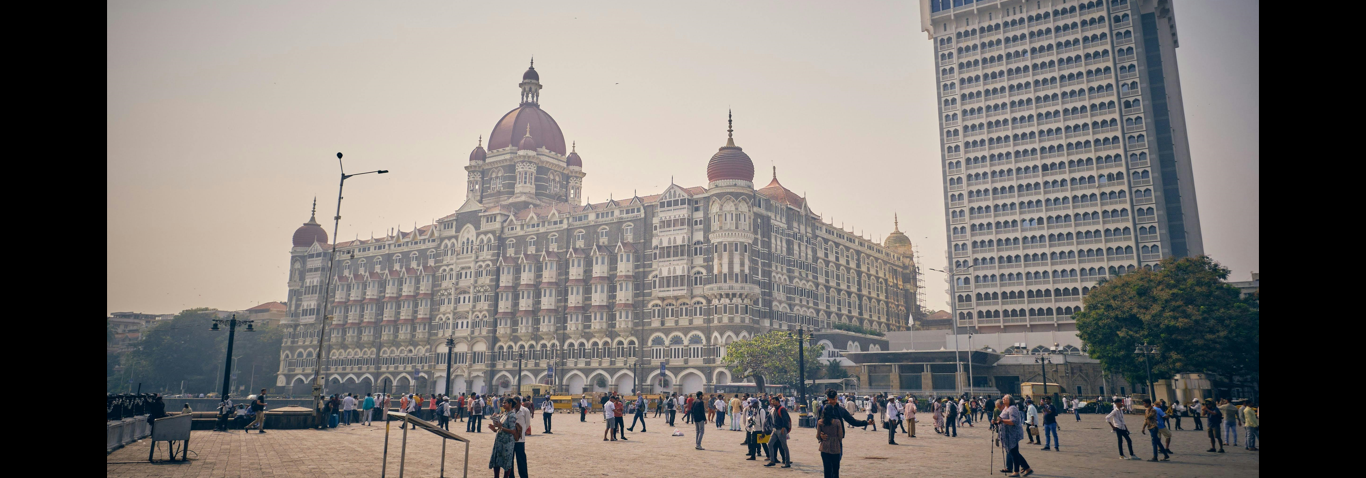

**Project Name**    
# **Hotel Booking Analysis**


##### **Project Type**    - EDA

---


##### **Contribution**    - Individual
##### **Project By -**    Avinash Watgure


# **Project Summary -**

This EDA (Exploratory Data Analysis) project investigates hotel booking cancellations, uncovers their underlying patterns, and suggests measures to reduce cancellations and secure revenue. We provide data-driven insights to stakeholders by visualizing data using various charts.

The project covers booking information for both a city hotel and a resort hotel, including details such as booking dates, length of stay, and the number of adults and children. It follows the basic principles of EDA and visualization.

**Key steps in the project include:**

Exploratory Data Analysis: Initial exploration and inspection of the raw data.
Data Cleaning: Handling null values and removing irrelevant data from the dataset.

- The analysis is divided into three parts:

1. Univariate Analysis: Examining a single variable at a time.
2. Bivariate Analysis: Comparing two variables to study their relationship.
3. Multivariate Analysis: Comparing more than two variables to understand complex relationships.

The project suggests practical measures to reduce cancellations and increase revenue. For example, hotels can offer discounts or promotions for early bookings or longer stays. Additionally, they can provide incentives such as free parking or breakfast for customers who book directly through the hotel's website instead of third-party sites.

Throughout the project, various charts are used to visualize the data, providing stakeholders with clear, data-driven insights.

In conclusion, by analyzing hotel booking data and understanding cancellation patterns, hotels can implement strategies to reduce cancellations and boost revenue.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Have you ever wondered when the best time of year to book a hotel room is or what the optimal length of stay is to get the best daily rate? What if you wanted to predict whether a hotel is likely to receive a high number of special requests ? This hotel booking dataset can help you explore these questions. It includes booking information for both a city hotel and a resort hotel, detailing when the booking was made, the length of stay, the number of adults, children, and babies, and the number of available parking spaces, among other factors. All personally identifying information has been removed to ensure privacy.**

#### **Define Your Business Objective?**

The project aims to gain insightful understanding of customers' behavior when booking a hotel. The demand varies across different customer segments, making forecasting more challenging as it may require different models for each segment. These insights can guide hotels in adjusting their customer strategies and preparing for uncertainties.







# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing necessary libraries needed in EDA
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px        # will be used for plotting

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive                #Mounting google drive
drive.mount('/content/drive')

In [ ]:
#Loading the dataset
hb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

### Dataset First View

In [ ]:
# Dataset First Look
hb_df

In [ ]:
# It give first five 5 rows of dataset
hb_df.head()

In [ ]:
# It give last five 5 rows of dataset
hb_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows : {len(hb_df.axes[0])}')
print(f'Number of columns : {len(hb_df.axes[1])}')

### Dataset Information

In [ ]:
# Dataset Info
hb_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
hb_df.duplicated().sum()


**There are 31994 duplicate values in the dataset**

In [ ]:
#Dropping the duplicate values
hb_df.drop_duplicates(inplace = True)

In [ ]:
hb_df.shape

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
hb_df.isnull().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(hb_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.title('Missing Values', fontsize=18)
plt.show()

### What did you know about your dataset?


In the dataset, there are four columns with missing or null values: **company, agent, country, and children**. Here's how we will handle the missing values in each column:

1. Children Column:
Null values will be replaced with 0, assuming that the customer had no children.
2. Country Column:
Null values will be replaced with 'Others', assuming that the customer's country was not mentioned during booking.
3. Company and Agent Columns:
Null values in these columns might indicate that the customers did not book a hotel through a company or an agent.

Since these columns contain numeric data, null values will be replaced with 0.

**By handling the missing values in this systematic way, we can ensure that the dataset is clean and ready for further analysis**.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
hb_df.columns

In [ ]:
# Dataset Describe
hb_df.describe()

### Variables Description

-  Hotel :  (Resort Hotel or City Hotel)
-is_canceled :  Value indicating if the booking was canceled (1) or not (0)
- lead_time :  Number of days that elapsed between the booking date and the arrival date
- arrival_date_year :  Year of arrival date
- arrival_date_month : Month of arrival date
- arrival_date_week_number : Week number of the year for the arrival date
- arrival_date_day_of_month : Day of arrival date
- stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights : Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults : Number of adults
- children : Number of children
- babies : Number of babies
- meal : Type of meal booked, presented in standard hospitality meal packages
- country : Country of origin
- market_segment : Market segment designation. Categories include "TA" (Travel Agents) and "TO" (Tour Operators)
- distribution_channel : Booking distribution channel. Categories include "TA" (Travel Agents) and "TO" (Tour Operators)
- is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations : Number of previous bookings that were canceled by the customer prior to the current booking
- previous_bookings_not_canceled : Number of previous bookings not canceled by the customer prior to the current booking
- reserved_room_type : Code of room type reserved (code is presented instead of designation for anonymity reasons)
- assigned_room_type : Code for the type of room assigned to the booking
- booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered into the PMS until the moment of check-in or cancellation
- deposit_type : Indication if the customer made a deposit to guarantee the booking
- agent : ID of the travel agency that made the booking
- company : ID of the company/entity that made the booking or was responsible for paying the booking
- days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type : Type of booking, assuming one of four categories
- adr : Average Daily Rate, defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces : Number of car parking spaces required by the customer
- total_of_special_requests : Number of special requests made by the customer (e.g., twin bed or high floor)
- reservation_status : Reservation last status, assuming one of three categories
- Canceled : Booking was canceled by the customer
- Check-Out : Customer has checked in but already departed
- No-Show : Customer did not check-in and did not inform the hotel of the reason why
- reservation_status_date : Date at which the last status was set





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:hb_df[col].unique() for col in hb_df})           # creating a series consisting every column name of the dataset and it's value.
                                                                # used for loop to iterate over every column in the dataset

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# creating a duplicate of the original dataset before making any changes in it
hb_df1 = hb_df.copy()

In [ ]:
hotle_name = hb_df1

In [ ]:
hb_df1.columns

In [ ]:
hotle_name.columns

In [ ]:
# replacing null values in children column with 0 assuming that family had 0 children
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent

hb_df1['children' ].fillna(0, inplace = True)
hb_df1['company' ].fillna(0, inplace = True)
hb_df1['agent' ].fillna(0, inplace = True)

# replacing null values in country column as 'Others'

hb_df1['country'].fillna('Others', inplace = True)

In [ ]:
# checking for null values after replacing them
hb_df1.isnull().sum()

In [ ]:
# dropping the 'company' column as it contains a lot of null values in coparison to other columns
hb_df1.drop(['company'], axis =1 , inplace = True)        # dropping the values vertically at axis 1 (columns)

In [ ]:
# dropping rows where no adults , children and babies are available because no bookings were made that day

no_guest=hb_df1[hb_df1['adults']+hb_df1['babies']+hb_df1['children']==0]
hb_df1.drop(no_guest.index, inplace=True)

In [ ]:
# adding some new columns to make our data analysis ready
hb_df1['total_people'] = hb_df1['adults'] + hb_df1['babies'] + hb_df1['children']       # creating total people column by adding all the people in that booking

hb_df1['total_stay'] = hb_df1['stays_in_weekend_nights'] + hb_df1['stays_in_week_nights']    # creating a column to check total stay by prople in that booking

In [ ]:
hb_df1.head()

In [ ]:
hb_df1.tail()

In [ ]:
# checking the final shape of the dataset
print(f' final shape of the dataset is {hb_df1.shape}')

In [ ]:
# checking the unique values which is to be analysed
pd.Series({col:hb_df1[col].unique() for col in hb_df1})


### **We have addressed all the missing values and added some new columns. Our dataset is now ready for analysis.**

### What all manipulations have you done and insights you found?

## **Data Manipulation Summary:**

1. Dataset Copy : Created a copy of the dataset before any manipulation to preserve
the original data.

2. Handling Missing Values :
- Filled missing values with 0 in the children, company, and agent columns, as these columns contain numerical values.
- Filled missing values in the country column with 'Others'.
Dropped the country column as it had 96% missing values and was not useful for our analysis.
3. New Columns :
- Created two new columns, and total_stay, for further analysis.
- In the total_people column, summed the number of babies, children, and adults.
- In the total_stay column, summed the number of weekend and weeknight stays.

4. Data Check: After manipulation, checked the new dataset to ensure it was ready for analysis.

### **Insights Found:**

1. Hotel Types : There are two types of hotels that guests can book, allowing analysis of which type was booked the most.

2. Guest Demographics : Guests come from different countries and belong to different types, providing insights into customer segmentation.

3. Meal Options : Guests can choose from different meal types, which can be analyzed for preferences.

4. Booking Channels : Guests can book directly or through various channels, offering insights into the most popular booking methods.

5. Booking Cancellations : The dataset includes information on booking cancellations and repeat guests, which can be analyzed for patterns.

6. Room Preferences : Guests can choose different room types when booking, allowing analysis of room preferences.

7. Average Daily Rate (ADR) : The adr column can be used to analyze the hotel's performance based on revenue.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

# **Which type of hotel is most preffered by the guests?**

In [ ]:
# Chart - 1 visualization code
# Storing unique hotel names in a variable
hotel_name=hb_df1['hotel'].unique()

# Checking the number of unique booking in each hotel type
unique_booking = hb_df1.hotel.value_counts().sort_values(ascending=True)

# Creating a donut chart using plotly.express
fig1 = px.pie(names = hotel_name, values = unique_booking, hole = 0.5, color = hotel_name,
              color_discrete_map={
                  'Resort Hotel': 'teal' , 'City Hotel' : 'nude'})

# Giving it a title and updating the text info
fig1.update_traces(textinfo = 'percent + value')
fig1.update_layout(title_text = 'Hotel Booking Percentage', title_x = 0.5)

# Setting the legend at center
fig1.update_layout(legend=dict(
    orientation = 'h',
    yanchor = 'bottom',
    xanchor = 'center',
    x = 0.5
))

# Display the figure
fig1.show()

# **Creating a pie chart for the above problem statement, as donut charts are not supported for export to GitHub.**

In [ ]:
# Count Hotel
hotel_count = hb_df1.hotel.value_counts()

# Plotting Values in a simple pie chart
hotel_count.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=50)
# Setting the title
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?


**I used a donut chart here because it effectively shows the proportions of categorical data, with the size of each segment representing the proportion of each category.**



##### 2. What is/are the insight(s) found from the chart?

**I found out that guests prefer Resort Hotel most over City Hotel.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This insight is valuable for stakeholders to determine which hotel is performing best, allowing them to allocate more capital to that hotel. While there is no significant negative growth, stakeholders can focus more on the City Hotel to increase bookings and overall revenue.**

#### Chart - 2

## **What is perecentage of hotel booking cancellation?**

In [ ]:
# Chart - 2 visualization code
# Extracting and storing unique values of hotel cancelation
cancelled_hotel = hb_df1.is_canceled.value_counts()

# Craeting a pie chart
cancelled_hotel.plot.pie(figsize=(9,7), explode=(0.05,0.05), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=50)

# Giving our pie chart a title
plt.title('Percentage of Hotel Cancellation and Non Cancellation')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I needed to illustrate a part-to-whole relationship and the percentage of each category. The pie chart was an excellent choice for displaying these segmented values.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that approximately 72.48% of bookings are not canceled by guests, while around 27.52% of bookings are canceled by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will assist stakeholders in comparing canceled and non-canceled bookings. By leveraging this information, stakeholders can offer options to reschedule bookings instead of canceling and implement a flexible cancellation policy to reduce booking cancellations.

#### Chart - 3

# ***Which type of meal is most preffered by guests?***

In [ ]:
# Chart - 3 visualization code

In [ ]:
# Counting each meal type
meal_count = hb_df1.meal.value_counts()

# Extracting each meal type and storing in a variable
meal_name = hb_df1['meal'].unique()

# Creating a dataset of each meal type and count
meal_df = pd.DataFrame(zip(meal_name,meal_count), columns = ['meal name', 'meal count'])

# Visualising the values on a bar chart
plt.figure(figsize=(15,5))
g = sns.barplot(data=meal_df, x='meal name', y ='meal count')
g.set_xticklabels(meal_df['meal name'])
plt.title('Most preffered meal type', fontsize=25)
plt.show()

**Meal type variable description:**

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

##### 1. Why did you pick the specific chart?

There were four values to compare, and bar graphs are ideal for comparing items between different groups, which is why I chose this chart.

##### 2. What is/are the insight(s) found from the chart?

After visualizing the above chart, we can see that BB (Bed and Breakfast)  is the **most preferred** meal type by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the gained insight above now stakeholders know that **BB (Bed and Breakfast)** is most preferred meal type so they can arrange raw material for this meal in advance and deliver the meal without any delay.

#### Chart - 4

# ***Which year has the most bookings ?***

In [ ]:
# Chart - 4 visualization code

In [ ]:
# Plotting with countplot
plt.figure(figsize=(10,4))
sns.countplot(x=hb_df1['arrival_date_year'],hue=hb_df1['hotel'])
plt.title("Number of bookings across year", fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are used to compare values across different groups, which is why I chose this type of chart.

##### 2. What is/are the insight(s) found from the chart?

From above insight I found out that hotel was booked most times in year 2016.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight above shows that the number of bookings declined **after 2016**. Stakeholders can investigate what went wrong after 2016 and address the issue to increase bookings. One approach is to gather feedback from guests and hold meetings with **employees who were serving in 2016** to identify potential problems and solutions.

#### Chart - 5

# ***Which month has the most bookings in each hotel type?***

In [ ]:
# Chart - 5 visualization code

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=hb_df1['arrival_date_month'],hue=hb_df1['hotel'])
plt.title("Number of booking across months", fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

I needed to compare values across the months, and a bar chart was one of the best choices for this purpose.

##### 2. What is/are the insight(s) found from the chart?


The insight above shows that **August and July are the two busiest months** compared to the others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Although there is a negative insight, hotels can use this information to prepare in advance and welcome their guests in the best way possible. Additionally, hotels can run promotional offers during these two months to attract more guests.

#### Chart - 6

# ***From which country most guests come?***

In [ ]:
country_df = hb_df1[hb_df1['is_canceled']==0] ['country'].value_counts().reset_index().head(10)
country_df.columns = ['country', 'number of guests']
plt.figure(figsize=(15,4))
sns.barplot(x='country', y='number of guests', data=country_df)
plt.title('Number of guests from each country', fontsize=20)
plt.show()

In [ ]:
# Chart - 6 visualization code

In [ ]:
# Coounting number of guests from various countries and changing column names
country_df = hb_df1[hb_df1['is_canceled']==0] ['country'].value_counts().reset_index().head(10)
country_df.columns = ['country', 'number of guests']
# Visualising the values on a bar chart
# setting the graph size
plt.figure(figsize=(15,4))
sns.barplot(x='country', y='number of guests', data=country_df,palette="Paired")
plt.title('Number of guests from each country', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

I chose to use a bar chart because it allows for clear comparison of values across different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I found out that **most guests come from PRT(Portugal).**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the insight that a significant number of guests are from Portugal, hotels could consider enhancing their menu with more Portuguese cuisines. This adjustment could potentially increase food orders from guests, leveraging their preferences and enhancing overall guest satisfaction.

#### Chart - 7

# ***Which distribution channel is most used in booking?***

In [ ]:
# Chart - 7 visualization code

In [ ]:
# Creating a datset of distribution channel name and count
dist_df = hb_df1['distribution_channel'].value_counts().reset_index()

# Renaming the columns to approproiate names
dist_df = dist_df.rename(columns={'index':'Channel name', 'distribution_channel':'channel count'})

# Creating a explode data
my_explode = (0.05,0.05,0.05,0.05,0.05)

#adding percentage columns to the distribution_channel_df
dist_df['percentage']=round(dist_df['channel count']*100/hb_df1.shape[0],1)
# Deciding the figure size
plt.figure(figsize=(15,6))

# Plotting the chart values
plt.pie(dist_df['channel count'], labels=None, explode = my_explode, startangle = 50)

# Adding legends with percenatge using list comprehension
labels = [f'{l}, {s}%' for l, s in zip(dist_df['Channel name'].value_counts().index.tolist(), dist_df['percentage'].values.tolist())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# Setting the chart title
plt.title('Most Used Booking Distribution Channels by Guests' ,fontsize = 16)

# Show the chart
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

# ***Which room type is most preffered by guests?***

In [ ]:
# Chart - 8 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values in chart
sns.countplot(x=hb_df1['reserved_room_type'],palette='husl',order=hb_df1['reserved_room_type'].value_counts().index)
# Setting the title
plt.title('Preffered Room Type by Guests', fontsize = 20)

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

By observing the above chart we can understand that the room type A most preffered ( almost 55,000) by the guests while booking the hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As it is clear that room type A is most used hotel should increase the number of A type room to maximize the revenue.



#### Chart - 9

# ***Which room type is most assigned?***

In [ ]:
# Chart - 9 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values
sns.countplot(x=hb_df1['assigned_room_type'], order = hb_df1['assigned_room_type'].value_counts().index)

# Setting the title
plt.title('Assigned Room Type to Guests', fontsize = 20)

# show the chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot represents categorical data with rectangular bars, where the height of each bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clear that room type A is most assigned to guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the 8th chart, we observed that approximately **55,000 guests preferred room type A**, but only 45,000 were assigned type A rooms. This discrepancy could be a reason for booking cancellations. To reduce cancellations, the hotel could increase the availability of type A rooms.

#### Chart - 10

# ***Top 5 agents in terms of most bookings?***

In [ ]:
# Chart - 10 visualization code
# Creating a dataset by grouping by agent column and it's count
agents = hb_df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count':'Booking Count'}
                                                                                ).sort_values(by = 'Booking Count', ascending = False)

# Extracting top 5 agents by booking count
top_5 = agents[:5]

# Explosion
explode = (0.02,0.02,0.02,0.02,0.02)

# Colors
colors = ( "orange", "cyan", "brown", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Plotting the values
fig, ax = plt.subplots(figsize =(15, 7))
wedges, texts, autotexts = ax.pie(top_5['Booking Count'],
                                  autopct = lambda pct: func(pct, top_5['Booking Count']),
                                  explode = explode,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 50,
                                  wedgeprops = wp)

# Adding legend
ax.legend(wedges, top_5['agent'],
          title ="agents",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 5 agents in terms of booking", fontsize = 17)

# Show chart
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart organizes and displays data as a percentage of the whole.

##### 2. What is/are the insight(s) found from the chart?

We observe that **Agent 9 has made the highest number of bookings**, followed by Agents 240, 0, 14, and 7.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The hotel can offer bonuses to recognize their incredible work and motivate them. This initiative can help boost revenue.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Creating a variable containing guests with their repeated counts
rep_guests = hb_df1['is_repeated_guest'].value_counts()

# Plotting the values in a pie chart
rep_guests.plot.pie(autopct='%1.2f%%', explode=(0.00,0.09), figsize=(15,6), shadow=False)

# Setting the title
plt.title('Percentage of Repeated Guests', fontsize=20)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart visually organizes data to illustrate each part as a percentage of the whole.

##### 2. What is/are the insight(s) found from the chart?

From the above insight we can see that  **3.86% guests** are repeated guests  .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that number of repeated guests is very low and it shows negative growth of the hotel. Hotel can offer loyality discount to their guests to increase repeated guests.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
cust_type = hb_df1['customer_type'].value_counts()

# Plotting the values in a line chart
cust_type.plot(figsize=(15,5))

# Setting the x label , y label and title
plt.xlabel('Count', fontsize=8)
plt.ylabel('Customer Type', fontsize=10)
plt.title('Customer Type and their booking count', fontsize=20)

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over different categories.

##### 2. What is/are the insight(s) found from the chart?

We can see that **Transient customer** type has most number of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The hotel can implement promotional offers to boost bookings across different categories. For instance, it could introduce discounts tailored for group bookings.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=hb_df1['market_segment'], order = hb_df1['market_segment'].value_counts().index)
plt.title('Market segment sahre in booking', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

##### 2. What is/are the insight(s) found from the chart?

Above insight shows that Online **TA (Travel Agent)** has the **most bookings**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative growth. Hotel should come up with some great idea to increase sahre among other market segments to increase the revenue.

#### Chart - 14

In [ ]:
# Visualization Code
# Counting each deposte type
deposite = hb_df1['deposit_type'].value_counts().index

# Setting the chart size
plt.figure(figsize=(8,4))

# plotting the values
sns.countplot(x=hb_df1['deposit_type'], order= deposite)
plt.title('Most used deposite type')
plt.show()

# **Bivariate and Multivariate Analysis**

Chart - 15

# ***How long people stay in the hotel?***

In [ ]:
# visualization code
# Creating a not cancelled dataframe
not_cancelled_df = hb_df1[hb_df1['is_canceled'] == 0]
# Creating a hotel stay dataframe
hotel_stay = not_cancelled_df[not_cancelled_df['total_stay'] <= 15]  #Visualizing pattern till 15days stay


# Setting plot size and plotting barchart
plt.figure(figsize = (15,5))
sns.countplot(x = hotel_stay['total_stay'], hue = hotel_stay['hotel'],palette='husl')

# Adding the label of the chart
plt.title('Total number of stays in each hotel',fontsize = 20)
plt.xlabel('Total stay')
plt.ylabel("Count of days")
plt.show()

From the chart above, it is evident that most guests at the **City hotel stay for 3 days**, whereas at the **Resort hotel, the majority stay only for 1 day**. To increase revenue, the hotel should focus on strategies to extend the average length of stay at the Resort hotel.

Chart-16

# ***Which hotel makes most revenue?***

In [ ]:
# Counting the revnue for each hotel type using groupby function
most_rev = hb_df1.groupby('hotel')['adr'].count()

# Plotting the values in a pie chart
most_rev.plot.pie(autopct='%1.2f%%', figsize=(15,5))

# Setting the title
plt.title('Percentage of daily revenue by each hotel type', fontsize=20)
plt.axis('equal')

# Show the chart
plt.show()


Based on the insights above, it's evident that the **City hotel contributes more to revenue generation compared to the Resort Hotel**.
Stakeholders could enhance Resort hotel services to encourage longer stays, thereby boosting revenue.

Chart - 17

# ***Which hotel has the longer waiting time?***

In [ ]:
# Grouping by hotel and taking the mean of days in waiting list
waiting_time_df = hb_df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# Waiting_time_df

# Setting the plot size
plt.figure(figsize=(8,4))

# Plotting the barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

# Setting the labels
plt.xlabel('Hotel type',fontsize=12)
plt.ylabel('waiting time',fontsize=12)
plt.title("Waiting time for each hotel type",fontsize=20)

# Show chart
plt.show()

The chart above indicates that the **City hotel** has a **longer waiting period** This may be due to longer guest stays at the City hotel, as noted in our previous analysis.

Stakeholders should consider increasing the number of rooms at the City hotel or converting some rooms from the Resort hotel to the City hotel to reduce waiting times.







Chart - 18

# ***Hotel with most repeated guests.***

In [ ]:
# Grouping hotel types on repeated guests
rep_guest = hb_df1[hb_df1['is_repeated_guest']==1].groupby('hotel').size().reset_index()

# Renaming the column
rep_guest = rep_guest.rename(columns={0:'number_of_repated_guests'})

# Setting the chart size
plt.figure(figsize=(8,4))

# Plotting the values in a bar chart
sns.barplot(x=rep_guest['hotel'],y=rep_guest['number_of_repated_guests'])

# Setting the labels and title
plt.xlabel('Hotel type', fontsize=12)
plt.ylabel('count of repeated guests', fontsize=12)
plt.title('Most repeated guests for each hotel', fontsize=20)

# Show Chart
plt.show()

We can see that **Resort Hotel** has **slightly more** repeated guests over City Hotel this could be because of less waiting time in Resort Hotel and better service there because of less rush.

Chart - 19

# ***What is the adr across different months?***

In [ ]:
# Grouping arrival_month and hotel on mean of adr
bookings_months=hb_df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
bookings_months['arrival_date_month']=pd.Categorical(bookings_months['arrival_date_month'],categories=months,ordered=True)

# Sorting the months
bookings_months=bookings_months.sort_values('arrival_date_month')
bookings_months

In [ ]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_months['arrival_date_month'],y=bookings_months['adr'],hue=bookings_months['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# Show chart
plt.show()

**City Hotel :** It is clear that City Hotel generates more revenue in May months in comparison to other months.

**Resort Hotel :** Resort Hotel generates more revenue in between July and August months.

Stakeholders could prepare in advance for these 2 months as these 2 months generate more revenue.

Chart-20

# ***Which distribution channel has highest adr?***

In [ ]:
# Grouping dist_channel and hotels on their adr
dist_channel_adr = hb_df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# Setting the figure size
plt.figure(figsize=(15,5))

# Creating a horizontal bar chart
sns.barplot(x='adr', y='distribution_channel', data=dist_channel_adr, hue='hotel')

# Setting the title
plt.title('ADR across each distribution channel', fontsize=20)

# Show chart
plt.show()

- **GDS (Global Distribution System)** :  GDS has played a significant role in driving the Average Daily Rate (ADR). It acts as a global intermediary connecting travel bookers with suppliers like hotels and accommodation providers. GDS provides real-time information on product availability, pricing, and facilitates automated transactions for travel agents and online booking platforms.

- **Direct** :  Bookings made directly with hotels.

- **TA/TO (Travel Agent/Travel Operator)** :  Bookings made through travel agents or operators.

- **Undefined** :  Bookings where the method is unspecified, possibly including walk-in reservations.







Chart - 21 - **Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code
# Setting the chart size
plt.figure(figsize=(15,10))

# Creating heatmap to see correlation of each columns
sns.heatmap(hb_df1.corr(numeric_only=True),annot=True)          # Setting the numeric only colun to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize=20)

# Show heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

1)  lead_time and total_stay is positively corelated. that means if customers stay more then the lead time increases.

2) adults,childrens and babies are corelated to each other. That means more the people more will be adr.

3)  is_repeated guest and previous bookings not canceled has strong corelation. That means repeated guests don't cancel their bookings.

#### Chart - 15 - **Pair Plot**

In [ ]:
# Pair Plot visualization code
sns.pairplot(hb_df1)
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables .

##### 2. What is/are the insight(s) found from the chart?

From the above pair plot we can see that if cancellation increases then total stay also decreases.
As the total number of people increases adr also increases. Thus adr and total people are directly proportional to each other.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**- The Resort Hotel is the most preferred, so stakeholders can offer discounts on City Hotel bookings to increase occupancy.**

**- Approximately 27.52% of bookings are cancelled, suggesting hotels can offer loyalty discounts to incentivize guests not to cancel.**

**- Hotels should maintain ample raw materials for BB (Bed and Breakfast) meals in advance, as it is the most preferred meal option.**

**- Increasing the number of rooms in City Hotels can reduce waiting times for guests.**

**- TA (Travel Agencies) has the highest number of bookings among other market segments, prompting hotels to consider offers to attract bookings from other segments.**

**- Room type A is favored by guests, indicating hotels should increase the
 availability of A-type rooms.**

**- The low number of repeat guests suggests areas needing improvement to     enhance guest satisfaction and increase repeat bookings.**

-**City hotels experience higher waiting times compared to resort hotels suggesting they are busier**

**- The optimal stay duration for both hotel types is typically less than 7 days, indicating a need for hotels to improve performance to attract longer stays.**

**- The highest number of guests came from Portugal.**

# **Conclusion**

To achieve the business objectives, I recommend the following strategies for the client:

1. **Implement dynamic pricing and introduce attractive offers and packages to attract new customers.**
2. **Introduce a loyalty points program to retain existing customers, allowing them to redeem points in future bookings.**
3. **Enhance amenities such as parking spaces, kids' corners, and free internet connection to boost booking numbers.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***